In [1]:
import tensorflow.keras

/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3

---

### Image recognition

In [2]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

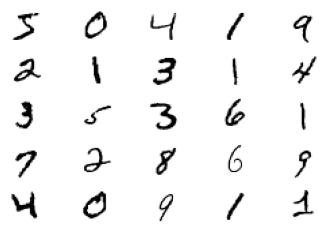

In [4]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
ytrain[0] #the first image in xtrain is a FIVE!!

5

In [6]:
xtrain[0][0][0] #greyscale color values - each number represents the greyness of the pixels 0 (white) and 255 (black) 

0

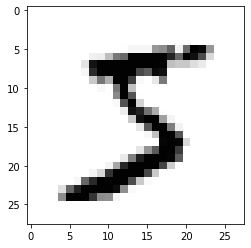

In [7]:
plt.imshow(xtrain[0], cmap=plt.cm.Greys)

In [8]:
xtrain[0].shape #each value in the 28 by 28 grid is a pixel in the picture, and the value in that pixel is the greyscale

(28, 28)

In [9]:
ytrain[0]

5

---

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(50, noise=0.1)


# 3 steps to running a Keras NN:
* 1: Create the network - define the structure
* 2: Compile the network - define computation graph (make your network fast and ready to train)
* 3: m.fit() - trains the NN on the data
* (4 : evaluate your results and repeat steps 1-3 possibly)

# 1 Create the Network

In [11]:
m = Sequential() #Sequential creates the model wrapper

In [12]:
X[0].shape

(2,)

In [13]:
#add layers one by one using m.add()
# Dense layers are the layers you've seen on Monday - fully connected.. units = no. of neurons
# the first Dense layer that you add is the first Hidden layer NOT THE INPUT LAYER!! 
# THE FIRST HIDDEN LAYER IN KERAS NEEDS TO BE TOLD ABOUT THE SHAPE OF EACH DATA POINT!! no other layers
# the bias neuron comes by default
# keras accepts high-dimensional data
m.add(Dense(units=2, activation='sigmoid', input_shape=(2,)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
m.add(Dense(units=1, activation='sigmoid'))

In [15]:
m.summary() #see the structure of the NN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


---

# 2: Compile the Network

In [16]:
#optimizer = what kind of gradient descent algorithm were going to use - rmsprop vs adam
#loss = binary prediction = binary_crossentropy, multiclass = categorical crossentropy,
#metrics = define our version of a succesful network.. for us accuracy (this is a callback function)
m.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# 3: m.fit!! 

In [17]:

# train the model and pass stats back into the variable h
# X, y = obvious
# epochs = iterations of feed forward and backprop
# batch_size = big batch_sizes train faster!! (because they compute gradient updates less frequently) 
# validation_split = cross validation - set aside some training data each epoch and m.predict on it
h  = m.fit(X, y, epochs=100, batch_size=5, validation_split=0.2)

Train on 40 samples, validate on 10 samples
Epoch 1/100
40/40 [==============================] - 0s 3ms/sample - loss: 1.0427 - acc: 0.4750 - val_loss: 0.8281 - val_acc: 0.6000
Epoch 2/100
40/40 [==============================] - 0s 233us/sample - loss: 1.0318 - acc: 0.4750 - val_loss: 0.8217 - val_acc: 0.6000
Epoch 3/100
40/40 [==============================] - 0s 263us/sample - loss: 1.0229 - acc: 0.4750 - val_loss: 0.8161 - val_acc: 0.6000
Epoch 4/100
40/40 [==============================] - 0s 248us/sample - loss: 1.0146 - acc: 0.4750 - val_loss: 0.8108 - val_acc: 0.6000
Epoch 5/100
40/40 [==============================] - 0s 261us/sample - loss: 1.0071 - acc: 0.4750 - val_loss: 0.8057 - val_acc: 0.6000
Epoch 6/100
40/40 [==============================] - 0s 273us/sample - loss: 0.9997 - acc: 0.4750 - val_loss: 0.8009 - val_acc: 0.6000
Epoch 7/100
40/40 [==============================] - 0s 263us/sample - loss: 0.9924 - acc: 0.4750 - val_loss: 0.7961 - val_acc: 0.6000
Epoch 8/100
4

# 4: Evaluate our results and try and improve

In [18]:
# look at your training accuracy and loss
print(len(h.history['loss']))
print(len(h.history['val_loss']))

100
100


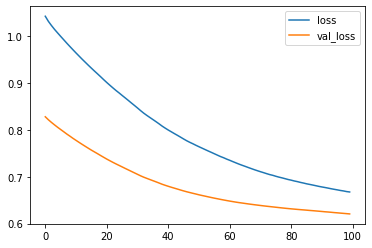

In [19]:
#visualise the networks training - LOSS
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

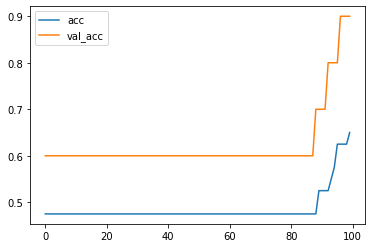

In [20]:
#visualise the networks training - ACCURACY
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [21]:
score = m.evaluate(X, y, batch_size=50)
print(score)

# prediction on new data points
print(m.predict(X[:10]))

50/50 [==============================] - 0s 21us/sample - loss: 0.6574 - acc: 0.7000
[0.6573880910873413, 0.7]
[[0.5119353 ]
 [0.47242856]
 [0.44051036]
 [0.45776477]
 [0.40583247]
 [0.4654718 ]
 [0.46718156]
 [0.51894504]
 [0.41631383]
 [0.42760187]]


### Predicting a single data point requires wrapping it in a list

In [26]:
m.predict(X[0])

ValueError: Error when checking input: expected dense_input to have shape (2,) but got array with shape (1,)

In [27]:
x = X[0].reshape(1,-1)
x.shape, X[0].shape

((1, 2), (2,))

In [28]:
m.predict(x)

array([[0.5119353]], dtype=float32)

---

### One important thing!! Clear the sessions between creating models, or restart your kernel

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()